<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/DeepLearning_Ghana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM on Ghana dataset...
Training GRU on Ghana dataset...
Training RNN on Ghana dataset...
Model Performance Metrics for Ghana:
           MSE       MAE
LSTM  0.009303  0.092993
GRU   0.010955  0.100859
RNN   0.020341  0.138956


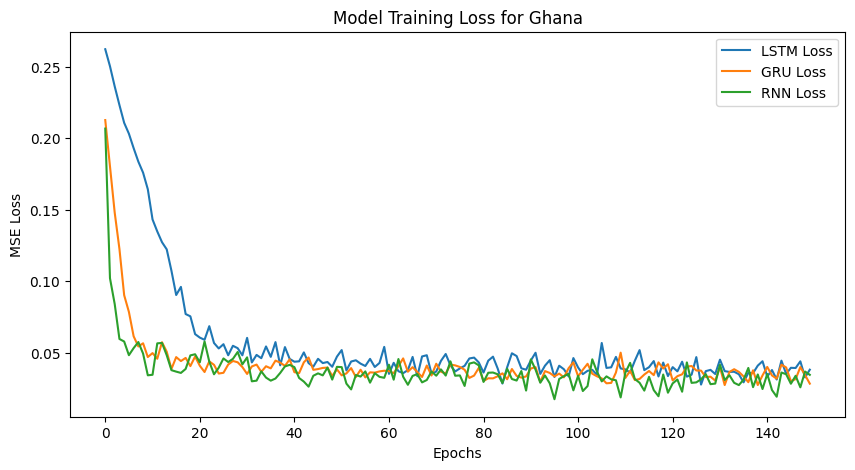

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Ghana dataset
file_path = "/Remittances_Ghana.csv"
df_ghana = pd.read_csv(file_path)

# Preprocess data
df_ghana["Rem_Ghana"] = df_ghana["Rem_Ghana"].astype(int)
scaler_ghana = MinMaxScaler(feature_range=(0, 1))
df_ghana["Rem_Ghana_Scaled"] = scaler_ghana.fit_transform(df_ghana["Rem_Ghana"].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# Define sequence length
SEQ_LENGTH = 3
data_series_ghana = df_ghana["Rem_Ghana_Scaled"].values
X_ghana, y_ghana = create_sequences(data_series_ghana, SEQ_LENGTH)
X_ghana = X_ghana.reshape((X_ghana.shape[0], X_ghana.shape[1], 1))

# Split into training and testing sets
train_size_ghana = int(len(X_ghana) * 0.8)
X_train_ghana, X_test_ghana = X_ghana[:train_size_ghana], X_ghana[train_size_ghana:]
y_train_ghana, y_test_ghana = y_ghana[:train_size_ghana], y_ghana[train_size_ghana:]

# Hyperparameters (optimized)
HIDDEN_UNITS = 100
DROPOUT_RATE = 0.2
LEARNING_RATE = 0.001
BATCH_SIZE = 4
EPOCHS = 150

# Function to build models
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == "LSTM":
        model.add(LSTM(HIDDEN_UNITS, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == "GRU":
        model.add(GRU(HIDDEN_UNITS, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == "RNN":
        model.add(SimpleRNN(HIDDEN_UNITS, activation='relu', return_sequences=False, input_shape=input_shape))

    model.add(Dropout(DROPOUT_RATE))  # Regularization
    model.add(Dense(1))

    optimizer = Adam(learning_rate=LEARNING_RATE)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Train models
models = {m: build_model(m, (SEQ_LENGTH, 1)) for m in ["LSTM", "GRU", "RNN"]}
history_ghana = {}
for name, model in models.items():
    print(f"Training {name} on Ghana dataset...")
    history_ghana[name] = model.fit(X_train_ghana, y_train_ghana, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

# Evaluate models on Ghana test set
results_ghana = {name: model.evaluate(X_test_ghana, y_test_ghana, verbose=0) for name, model in models.items()}
results_ghana_df = pd.DataFrame(results_ghana, index=["MSE", "MAE"]).T

# Display results
print("Model Performance Metrics for Ghana:")
print(results_ghana_df)

# Plot training loss
plt.figure(figsize=(10, 5))
for name, hist in history_ghana.items():
    plt.plot(hist.history['loss'], label=f"{name} Loss")
plt.legend()
plt.title("Model Training Loss for Ghana")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()
